In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
%store -r student_courses
%store -r student_majors
%store -r stem_paths
%store -r jacobs
%store -r jacobs_ethnicities
%store -r bcdi
%store -r waivers
%store -r beeps

In [127]:
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
color_list = ['#820263', '#B93C89', '#C44995', '#FC729B']
jacobs_colors = [mcolors.to_rgb(x) for x in color_list]

In [124]:
jacobs_ethnicities.drop_duplicates(subset='ppsk', inplace=True)

## Finding proportion of women/URMs through all top majors at Jacobs and compare it to Jacobs

In [125]:
top_majors = ['L&S Computer Science', 'Mechanical Engineering', 'Electrical Eng & Comp Sci', 'Cognitive Science', 'Letters & Sci Undeclared', 'Architecture']
majors = student_majors.groupby('ppsk').last().reset_index()

def add_major(df):
    temp = df[:]
    na_majors = df[df['major'].isna()].merge(stem_paths[['major.intended.department','ppsk']], on ='ppsk')
    new_temp = temp.merge(na_majors[['ppsk','major.intended.department']], on='ppsk', how='left').drop_duplicates()
    new_temp['major'].fillna(value = new_temp['major.intended.department'],inplace=True)
    return new_temp.drop('major.intended.department', axis=1)

In [126]:
prop_berkeley = student_courses[['ppsk']].drop_duplicates().merge(stem_paths[['ppsk', 'ethnic.l1','ethnic.l2','ethnic.l3','gender']], on='ppsk', how='inner').merge(majors[['ppsk','major',]], how='left').drop_duplicates()
prop_berkeley = add_major(prop_berkeley)
prop_berkeley = prop_berkeley[prop_berkeley['major'].isin(top_majors)]
prop_berkeley

,ppsk,ethnic.l1,ethnic.l2,ethnic.l3,gender,major
3,731964,White/Other,White,White,Male,Mechanical Engineering
52,826065,White/Other,White,White,Male,L&S Computer Science
55,832181,International,International,International,Male,L&S Computer Science
72,680369,White/Other,White,White,Male,Architecture
78,695918,White/Other,White,White,Male,L&S Computer Science
...,...,...,...,...,...,...
80291,2727864,Asian/Pacific Islander,Asian,Chinese,Male,Electrical Eng & Comp Sci
80300,2632309,White/Other,White,White,Male,Letters & Sci Undeclared
80301,1315825,Asian/Pacific Islander,Asian,Chinese,Male,Letters & Sci Undeclared
80305,2632260,White/Other,White,White,Female,Letters & Sci Undeclared


In [190]:
berk_women_prop = prop_berkeley.groupby(['major', 'gender']).count().unstack()['ppsk']
berk_women_prop['Total'] = berk_women_prop.sum(axis=1)
berk_women_prop['Women Proportion'] = (berk_women_prop['Female']/berk_women_prop['Total'])*100
berk_women_prop['Other Proportion'] = 100 - berk_women_prop['Women Proportion']
berk_women_prop.sort_values(by='Women Proportion',ascending=False,inplace=True)
berk_women_prop

gender,Decline to State,Female,Male,Total,Women Proportion,Other Proportion
major,,,,,,
Cognitive Science,8,484,334,826,58.595642,41.404358
Architecture,3,730,625,1358,53.755523,46.244477
Letters & Sci Undeclared,4,227,311,542,41.881919,58.118081
L&S Computer Science,25,613,1900,2538,24.152876,75.847124
Electrical Eng & Comp Sci,15,166,765,946,17.547569,82.452431
Mechanical Engineering,4,264,1374,1642,16.077954,83.922046


In [129]:
prop_jacobs = jacobs_ethnicities.drop_duplicates(subset='ppsk').merge(majors[['ppsk','major',]], how='left')
prop_jacobs = add_major(prop_jacobs)
prop_jacobs = prop_jacobs[prop_jacobs['major'].isin(top_majors)]
prop_jacobs

,ppsk,DES INV Students,All Courses Students,Maker Pass Holders,ethnic.l1,ethnic.l2,ethnic.l3,gender,year.name,major
1,1482482,N,Y,Y,International,International,International,Male,2015 Fall,L&S Computer Science
3,1473315,N,Y,Y,Asian/Pacific Islander,Asian,Chinese,Female,2015 Fall,L&S Computer Science
8,1473351,N,Y,N,International,International,International,Male,2015 Fall,L&S Computer Science
12,1482526,N,N,Y,White/Other,Other/Decline to State,Decline to State,Male,2015 Fall,Mechanical Engineering
14,1474646,N,N,Y,Asian/Pacific Islander,Asian,Chinese,Male,2015 Fall,L&S Computer Science
...,...,...,...,...,...,...,...,...,...,...
5438,2741368,N,Y,N,Asian/Pacific Islander,Asian,Chinese,Female,2020 Spring,L&S Computer Science
5440,2740646,N,Y,N,Asian/Pacific Islander,Asian,Chinese,Male,2020 Spring,Cognitive Science
5442,2639777,N,Y,N,Asian/Pacific Islander,Asian,Chinese,Female,2020 Spring,Cognitive Science
5443,2635196,N,Y,N,Asian/Pacific Islander,Asian,Korean,Male,2020 Spring,Letters & Sci Undeclared


In [192]:
jacobs_women_prop = prop_jacobs.groupby(['major', 'gender']).count().unstack()['ppsk']
jacobs_women_prop['Total'] = jacobs_women_prop.sum(axis=1)
jacobs_women_prop['Women Proportion'] = (jacobs_women_prop['Female']/jacobs_women_prop['Total'])*100
jacobs_women_prop['Other Proportion'] = 100 - jacobs_women_prop['Women Proportion']
jacobs_women_prop.sort_values(by='Women Proportion',ascending=False,inplace=True)
jacobs_women_prop

gender,Decline to State,Female,Male,Total,Women Proportion,Other Proportion
major,,,,,,
Cognitive Science,2.0,169.0,94.0,265.0,63.773585,36.226415
Architecture,3.0,97.0,79.0,179.0,54.189944,45.810056
L&S Computer Science,10.0,211.0,454.0,675.0,31.259259,68.740741
Letters & Sci Undeclared,NaN,12.0,28.0,40.0,30.000000,70.000000
Electrical Eng & Comp Sci,2.0,71.0,230.0,303.0,23.432343,76.567657
Mechanical Engineering,4.0,134.0,495.0,633.0,21.169036,78.830964


In [193]:
avg_women_jacobs = jacobs_ethnicities.groupby('gender').count()[['ppsk']].transpose()
avg_women_jacobs['Women Proportion'] = (avg_women_jacobs['Female']/avg_women_jacobs.sum(axis=1))*100
avg_women_jacobs

gender,Decline to State,Female,Male,Women Proportion
ppsk,54,2268,3123,41.652893


In [194]:
avg_women_berkeley = prop_berkeley.groupby('gender').count()[['ppsk']].transpose()
avg_women_berkeley['Women Proportion'] = (avg_women_berkeley['Female']/avg_women_berkeley.sum(axis=1))*100
avg_women_berkeley

gender,Decline to State,Female,Male,Women Proportion
ppsk,59,2484,5309,31.635252


In [199]:
jacobs_font = {'family': 'serif',
        'color':  mcolors.to_rgb('#820263'),
        'weight': 'bold',
        'size': 12
        }
berkeley_font = {'family': 'serif',
        'color':  'darkgoldenrod',#(0.231,0.494,0.631),
        'weight': 'bold',
        'size': 12
        }

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12, 15))

# Berkeley graph
ax1.bar(berk_women_prop.index, bottom='Women Proportion', height='Other Proportion',stacked=True, data=berk_women_prop) #color=mcolors.to_rgb('#820263'))
ax1.set_title("Proportion of Women in Top Majors (Berkeley)")
ax1.axvline(x = avg_women_berkeley['Women Proportion'][0],color='darkgoldenrod')
ax1.text(32,4,"Berkeley Average \n\n (31.6%)",fontdict=berkeley_font)
ax1.set_xticks([x for x in range(0,80,10)])
ax1.set_xticklabels([str(int(x))+'%' for x in ax1.get_xticks()])

# Jacobs Graph
ax2.barh(jacobs_women_prop.index,'Women Proportion', data=jacobs_women_prop)
ax2.set_title("Proportion of Women in Top Majors (Jacobs)")
ax2.axvline(x = avg_women_jacobs['Women Proportion'][0],color=mcolors.to_rgb('#820263'))
ax2.text(43,4,"Jacobs Average \n\n(41.7%)",fontdict=jacobs_font)
ax2.set_xticks([x for x in range(0,80,10)])
ax2.set_xticklabels([str(int(x))+'%' for x in ax2.get_xticks()])

AttributeError: 'Rectangle' object has no property 'stacked'

In [220]:
berk_women_prop.iloc[:,:3]

gender,Decline to State,Female,Male
major,,,
Cognitive Science,8,484,334
Architecture,3,730,625
Letters & Sci Undeclared,4,227,311
L&S Computer Science,25,613,1900
Electrical Eng & Comp Sci,15,166,765
Mechanical Engineering,4,264,1374


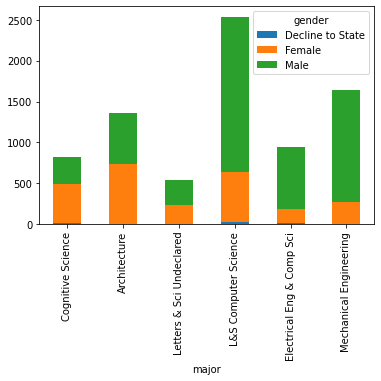

In [221]:
berk_women_prop.iloc[:,:3].plot(kind='bar', stacked=True, ) #color=mcolors.to_rgb('#820263'))
###plt.set_title("Proportion of Women in Top Majors (Berkeley)")
#plt.axvline(x = avg_women_berkeley['Women Proportion'][0],color='darkgoldenrod')
#plt.text(32,4,"Berkeley Average \n\n (31.6%)",fontdict=berkeley_font)
#plt.set_xticks([x for x in range(0,80,10)])
#plt.set_xticklabels([str(int(x))+'%' for x in ax.get_xticks()])